# <center>Introduction to Pandas</center>

![](https://pandas.pydata.org/_static/pandas_logo.png)


## Installation

Simply,
```
pip install pandas
```


## Reading data from a CSV file

You can read data from a CSV file using the ``read_csv`` function. By default, it assumes that the fields are comma-separated.

In [74]:
import pandas as pd
import numpy as np
import datetime as dt

>The `imdb.csv` dataset contains Highest Rated IMDb "Top 1000" Titles.

In [9]:
# load imdb dataset as pandas dataframe

imdb = pd.read_csv("imdb_1000.csv")
print(imdb.head(5))

   star_rating                     title content_rating   genre  duration  \
0          9.3  The Shawshank Redemption              R   Crime       142   
1          9.2             The Godfather              R   Crime       175   
2          9.1    The Godfather: Part II              R   Crime       200   
3          9.0           The Dark Knight          PG-13  Action       152   
4          8.9              Pulp Fiction              R   Crime       154   

                                         actors_list  
0  [u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...  
1    [u'Marlon Brando', u'Al Pacino', u'James Caan']  
2  [u'Al Pacino', u'Robert De Niro', u'Robert Duv...  
3  [u'Christian Bale', u'Heath Ledger', u'Aaron E...  
4  [u'John Travolta', u'Uma Thurman', u'Samuel L....  


In [10]:
# show first 5 rows of imdb_df
imdb.head(5)

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


>The `bikes.csv` dataset contains information about the number of bicycles that used certain bicycle lanes in Montreal in the year 2012.

In [13]:
# load bikes dataset as pandas dataframe
bikes = pd.read_csv("bikes.csv",sep=';',parse_dates=True, dayfirst=True)

In [14]:
# show first 3 rows of bikes_df
bikes.head(3)

,Date,Unnamed: 1,Rachel / Papineau,Berri1,Maisonneuve_2,Maisonneuve_1,Brébeuf,Parc,PierDup,CSC (Côte Sainte-Catherine),Pont_Jacques_Cartier
0,01/01/2012,00:00,16,35,51,38,5.0,26,10,0,27.0
1,02/01/2012,00:00,43,83,153,68,11.0,53,6,1,21.0
2,03/01/2012,00:00,58,135,248,104,2.0,89,3,2,15.0


## Selecting columns

When you read a CSV, you get a kind of object called a DataFrame, which is made up of rows and columns. You get columns out of a DataFrame the same way you get elements out of a dictionary.

In [15]:
# list columns of imdb_df
imdb.columns

Index(['star_rating', 'title', 'content_rating', 'genre', 'duration',
       'actors_list'],
      dtype='object')

In [16]:
# what are the datatypes of values in columns
imdb.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

In [21]:
# list first 5 movie titles
imdb.head(5)['title']

#  or

#imdb['title'].head(5)

0    The Shawshank Redemption
1               The Godfather
2      The Godfather: Part II
3             The Dark Knight
4                Pulp Fiction
Name: title, dtype: object

In [24]:
# show only movie title and genre
col = ['title','genre']
imdb[col]

,title,genre
0,The Shawshank Redemption,Crime
1,The Godfather,Crime
2,The Godfather: Part II,Crime
3,The Dark Knight,Action
4,Pulp Fiction,Crime
...,...,...
974,Tootsie,Comedy
975,Back to the Future Part III,Adventure
976,Master and Commander: The Far Side of the World,Action
977,Poltergeist,Horror


## Understanding columns

On the inside, the type of a column is ``pd.Series`` and pandas Series are internally numpy arrays. If you add ``.values`` to the end of any Series, you'll get its internal **numpy array**.

In [25]:
# show the type of duration column
imdb['duration'].dtype

dtype('int64')

In [28]:
# show duration values of movies as numpy arrays
n = np.array(imdb['duration'])
n

array([142, 175, 200, 152, 154,  96, 161, 201, 195, 139, 178, 148, 124,
       142, 179, 169, 133, 207, 146, 121, 136, 130, 130, 106, 127, 116,
       175, 118, 110,  87, 125, 112, 102, 107, 119,  87, 169, 115, 112,
       109, 189, 110, 150, 165, 155, 137, 113, 165,  95, 151, 155, 153,
       125, 130, 116,  89, 137, 117,  88, 165, 170,  89, 146,  99,  98,
       116, 156, 122, 149, 134, 122, 136, 157, 123, 119, 137, 128, 120,
       229, 107, 134, 103, 177, 129, 102, 216, 136,  93,  68, 189,  99,
       108, 113, 181, 103, 138, 110, 129,  88, 160, 126,  91, 116, 125,
       143,  93, 102, 132, 153, 183, 160, 120, 138, 140, 153, 170, 129,
        81, 127, 131, 172, 115, 108, 107, 129, 156,  96,  91,  95, 162,
       130,  86, 186, 151,  96, 170, 118, 161, 131, 126, 131, 129, 224,
       180, 105, 117, 140, 119, 124, 130, 139, 107, 132, 117, 126, 122,
       178, 238, 149, 172,  98, 116, 116, 123, 148, 123, 182,  92,  93,
       100, 135, 105,  94, 140,  83,  95,  98, 143,  99,  98, 12

## Applying functions to columns

Use `.apply` function to apply any function to each element of a column.

In [34]:
# convert all the movie titles to uppercase
imdb["title"].apply(lambda s: s.upper()).head()


0    THE SHAWSHANK REDEMPTION
1               THE GODFATHER
2      THE GODFATHER: PART II
3             THE DARK KNIGHT
4                PULP FICTION
Name: title, dtype: object

## Plotting a column

Use ``.plot()`` function!

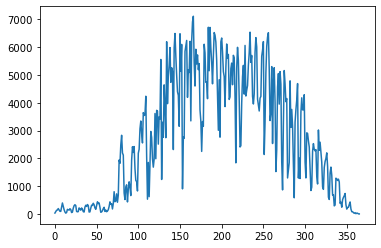

In [36]:
# plot the bikers travelling to Berri1 over the year
bikes['Berri1'].plot()


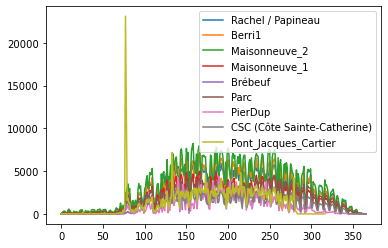

In [37]:
# plot all the columns of bikes_df
col = bikes.columns
bikes[col].plot()

## Value counts

Get count of unique values in a particular column/Series.

In [41]:
# what are the unique genre in imdb_df?
p = imdb['genre']
print(set(p))

"""OR

imdb['genre'].unique()

"""

{'Drama', 'Adventure', 'Western', 'Horror', 'History', 'Thriller', 'Biography', 'Animation', 'Mystery', 'Crime', 'Sci-Fi', 'Comedy', 'Action', 'Film-Noir', 'Fantasy', 'Family'}


'OR'

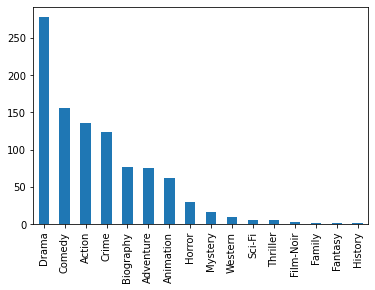

In [43]:
# plotting value counts of unique genres as a bar chart
imdb['genre'].value_counts().plot(kind = 'bar')

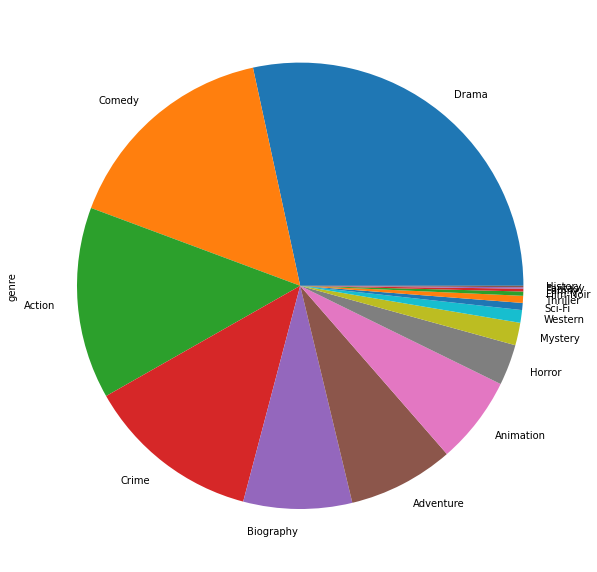

In [47]:
# plotting value counts of unique genres as a pie chart
imdb['genre'].value_counts().plot(kind = 'pie',figsize =(10,16))

## Index

### DATAFRAME = COLUMNS + INDEX + ND DATA

### SERIES = INDEX + 1-D DATA

**Index** or (**row labels**) is one of the fundamental data structure of pandas. It can be thought of as an **immutable array** and an **ordered set**.

> Every row is uniquely identified by its index value.

In [48]:
# show index of bikes_df
bikes.index

RangeIndex(start=0, stop=366, step=1)

In [53]:
# get row for date 2012-01-01
bikes.loc[bikes["Date"]=="2012-01-01"]

,Date,Unnamed: 1,Rachel / Papineau,Berri1,Maisonneuve_2,Maisonneuve_1,Brébeuf,Parc,PierDup,CSC (Côte Sainte-Catherine),Pont_Jacques_Cartier


#### To get row by integer index:

Use ``.iloc[]`` for purely integer-location based indexing for selection by position.

In [54]:
# show 11th row of imdb_df using iloc
bikes.iloc[11]

Date                           12/01/2012
Unnamed: 1                          00:00
Rachel / Papineau                      63
Berri1                                157
Maisonneuve_2                         261
Maisonneuve_1                         134
Brébeuf                                 3
Parc                                  137
PierDup                                 9
CSC (Côte Sainte-Catherine)             1
Pont_Jacques_Cartier                   15
Name: 11, dtype: object

## Selecting rows where column has a particular value

In [61]:
# select only those movies where genre is adventure
imdb['title'].loc[imdb['genre']=='Adventure']

7          The Lord of the Rings: The Return of the King
10     The Lord of the Rings: The Fellowship of the Ring
14                 The Lord of the Rings: The Two Towers
15                                          Interstellar
54                                    Back to the Future
                             ...                        
936                                            True Grit
937                                            Labyrinth
943                                      The Bucket List
953                                The NeverEnding Story
975                          Back to the Future Part III
Name: title, Length: 75, dtype: object

In [72]:
# which genre has highest number of movies with star rating above 8 and duration more than 130 minutes?
p = imdb['genre'].loc[imdb['duration']>130].loc[imdb['star_rating']>8.0]
p.value_counts().head(1)

Drama    36
Name: genre, dtype: int64

## Adding a new column to DataFrame

In [76]:
# add a weekday column to bikes_df
#bikes.insert(1,"weekday",bikes["Date"].dt.weekday_name)

## Deleting an existing column from DataFrame

In [80]:
# remove column 'Unnamed: 1' from bikes_df
bikes.drop('Unnamed: 1',axis=1)

,Date,Rachel / Papineau,Berri1,Maisonneuve_2,Maisonneuve_1,Brébeuf,Parc,PierDup,CSC (Côte Sainte-Catherine),Pont_Jacques_Cartier
0,01/01/2012,16,35,51,38,5.0,26,10,0,27.0
1,02/01/2012,43,83,153,68,11.0,53,6,1,21.0
2,03/01/2012,58,135,248,104,2.0,89,3,2,15.0
3,04/01/2012,61,144,318,116,2.0,111,8,1,19.0
4,05/01/2012,95,197,330,124,6.0,97,13,2,16.0
...,...,...,...,...,...,...,...,...,...,...
361,27/12/2012,8,12,7,4,NaN,1,2,0,NaN
362,28/12/2012,0,35,3,38,NaN,0,0,0,NaN
363,29/12/2012,0,27,8,42,NaN,9,0,0,NaN
364,30/12/2012,0,5,1,5,NaN,6,0,0,NaN


## Deleting a row in DataFrame

In [81]:
# remove row no. 1 from bikes_df
bikes.drop(1,axis=0)

,Date,Unnamed: 1,Rachel / Papineau,Berri1,Maisonneuve_2,Maisonneuve_1,Brébeuf,Parc,PierDup,CSC (Côte Sainte-Catherine),Pont_Jacques_Cartier
0,01/01/2012,00:00,16,35,51,38,5.0,26,10,0,27.0
2,03/01/2012,00:00,58,135,248,104,2.0,89,3,2,15.0
3,04/01/2012,00:00,61,144,318,116,2.0,111,8,1,19.0
4,05/01/2012,00:00,95,197,330,124,6.0,97,13,2,16.0
5,06/01/2012,00:00,75,146,244,98,4.0,86,4,0,17.0
...,...,...,...,...,...,...,...,...,...,...,...
361,27/12/2012,00:00,8,12,7,4,NaN,1,2,0,NaN
362,28/12/2012,00:00,0,35,3,38,NaN,0,0,0,NaN
363,29/12/2012,00:00,0,27,8,42,NaN,9,0,0,NaN
364,30/12/2012,00:00,0,5,1,5,NaN,6,0,0,NaN


## Group By

Any groupby operation involves one of the following operations on the original object. They are −

- Splitting the Object

- Applying a function

- Combining the results

In many situations, we split the data into sets and we apply some functionality on each subset. In the apply functionality, we can perform the following operations −

- **Aggregation** − computing a summary statistic

- **Transformation** − perform some group-specific operation

- **Filtration** − discarding the data with some condition

In [85]:
# group imdb_df by movie genres
p = imdb.groupby(['genre'])
p.first()

,star_rating,title,content_rating,duration,actors_list
genre,,,,,
Action,9.0,The Dark Knight,PG-13,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
Adventure,8.9,The Lord of the Rings: The Return of the King,PG-13,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
Animation,8.6,Spirited Away,PG,125,"[u'Daveigh Chase', u'Suzanne Pleshette', u'Miy..."
Biography,8.9,Schindler's List,R,195,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings..."
Comedy,8.6,Life Is Beautiful,PG-13,116,"[u'Roberto Benigni', u'Nicoletta Braschi', u'G..."
Crime,9.3,The Shawshank Redemption,R,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
Drama,8.9,12 Angry Men,NOT RATED,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
Family,7.9,E.T. the Extra-Terrestrial,PG,115,"[u'Henry Thomas', u'Drew Barrymore', u'Peter C..."
Fantasy,7.7,The City of Lost Children,R,112,"[u'Ron Perlman', u'Daniel Emilfork', u'Judith ..."


In [88]:
# get crime movies group
p.get_group('Crime')

,star_rating,title,content_rating,duration,actors_list
0,9.3,The Shawshank Redemption,R,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
4,8.9,Pulp Fiction,R,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
21,8.7,City of God,R,130,"[u'Alexandre Rodrigues', u'Matheus Nachtergael..."
...,...,...,...,...,...
927,7.5,Brick,R,110,"[u'Joseph Gordon-Levitt', u'Lukas Haas', u'Emi..."
931,7.4,Mean Streets,R,112,"[u'Robert De Niro', u'Harvey Keitel', u'David ..."
950,7.4,Bound,R,108,"[u'Jennifer Tilly', u'Gina Gershon', u'Joe Pan..."
969,7.4,Law Abiding Citizen,R,109,"[u'Gerard Butler', u'Jamie Foxx', u'Leslie Bibb']"


In [90]:
# get mean of movie durations for each group
p['duration'].mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

In [93]:
# change duration of all movies in a particular genre to mean duration of the group
p['duration']=p['duration'].mean()

TypeError: 'DataFrameGroupBy' object does not support item assignment

In [ ]:
# drop groups/genres that do not have average movie duration greater than 120.

In [ ]:
# group weekday wise bikers count

In [ ]:
# get weekday wise biker count

In [ ]:
# plot weekday wise biker count for 'Berri1'

![](https://memegenerator.net/img/instances/500x/73988569/pythonpandas-is-easy-import-and-go.jpg)